### Comprehensive Analysis of PM2.5 Trends and Air Quality Monitoring Gaps: A Geospatial and Temporal Study (Jan-Nov 2024)"

#### Objectives
1. Analyze Temporal Trends in PM2.5 Levels

- Determine the daily, weekly, monthly, quarterly, and yearly averages of PM2.5 concentrations.
- Identify periods of significant variation, including spikes or dips, in PM2.5 levels.
- Investigate seasonal patterns and correlations with potential influencing factors such as weather or human activity.

2. Assess Data Collection Gaps

- Identify and quantify periods when monitors were not collecting data.
- Analyze the duration and frequency of these gaps and their potential impact on overall analysis.
- Provide recommendations to minimize future data collection gaps.

3. Map the Geographic Distribution of Monitoring Locations

- Visualize the spatial locations of all monitors using their latitude and longitude.
- Analyze the distribution of monitoring stations to ensure adequate spatial coverage for air quality assessment.
- Highlight areas with insufficient or no monitoring coverage.

4. Evaluate Spatial Trends in PM2.5 Levels

- Compare PM2.5 levels across different monitoring locations to identify hotspots or areas with consistently higher or lower air pollution.
- Investigate potential sources of pollution in identified hotspots.

5. Quantify PM2.5 Exposure for Public Health Implications

- Estimate the duration and intensity of PM2.5 exposure in different locations.
- Highlight areas and time periods where PM2.5 levels exceeded safe limits (e.g., WHO guidelines).
- Provide insights for public health interventions and awareness campaigns.

6. Assess Monitor Reliability and Performance

- Evaluate the performance of individual monitoring stations by analyzing data consistency and frequency of collection gaps.
- Identify stations that require maintenance or replacement.

7. Support Decision-Making for Air Quality Improvements

- Provide actionable insights for policymakers and stakeholders to develop targeted interventions.
- Recommend strategies for reducing PM2.5 levels in high-pollution areas.
- Offer suggestions for optimizing the placement of future monitoring stations.

8. Generate Predictive Insights

- Use the dataset to develop predictive models for PM2.5 levels based on historical data.
- Predict high-risk periods or locations to enable proactive mitigation efforts.


In [3]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.display import display, HTML

import warnings
# Ignore all warnings
warnings.filterwarnings('ignore')

In [24]:
import pandas as pd

# Loading Datasets (January- November 2024)
file_paths = [
    r"C:\Users\PC\Desktop\Nairobi City County\AQ_Stuff\csv files\NBO_jan-mar_2024.csv",
    r"C:\Users\PC\Desktop\Nairobi City County\AQ_Stuff\csv files\NBO_April_June_2024.csv",
    r"C:\Users\PC\Desktop\Nairobi City County\AQ_Stuff\csv files\NBO_July_2024.csv",
    r"C:\Users\PC\Desktop\Nairobi City County\AQ_Stuff\csv files\NairobiAQAugust2024.csv",
    r"C:\Users\PC\Desktop\Nairobi City County\AQ_Stuff\csv files\NBO_Sep_2024.csv",
    r"C:\Users\PC\Desktop\Nairobi City County\AQ_Stuff\csv files\NBO_oct_2024.csv",
    r"C:\Users\PC\Desktop\Nairobi City County\AQ_Stuff\csv files\NBO_Nov_2024.csv"
]

dataframes = []

for file_path in file_paths:
    try:
        df = pd.read_csv(file_path, encoding='utf-8-sig') 
        dataframes.append(df)
    except UnicodeDecodeError:

        df = pd.read_csv(file_path, encoding='latin1')
        dataframes.append(df)

combined_df = pd.concat(dataframes, axis=0, ignore_index=True)



### Data Understanding

In [25]:
# Printing the first 5 rows of the dataset
print(combined_df.head())
print(f"Combined dataset contains {combined_df.shape[0]} rows and {combined_df.shape[1]} columns.")


                 timestamp  Month     display_name  longitude  latitude  \
0  2024-03-31 22:00:00 UTC  March          Langata  36.741783 -1.338275   
1  2024-03-31 22:00:00 UTC  March          Langata  36.741783 -1.338275   
2  2024-03-31 22:00:00 UTC  March  Nairobi Central  36.821671 -1.287094   
3  2024-03-31 22:00:00 UTC  March  Nairobi Central  36.821671 -1.287094   
4  2024-03-31 22:00:00 UTC  March        Baba Dogo  36.886487 -1.243396   

     pm2_5  Unnamed: 6  Unnamed: 7  
0   8.8498         NaN         NaN  
1   8.8498         NaN         NaN  
2   9.3353         NaN         NaN  
3   9.3353         NaN         NaN  
4  14.8182         NaN         NaN  
Combined dataset contains 260055 rows and 8 columns.


In [19]:
combined_df.describe()

,longitude,latitude,pm2_5,Unnamed: 6,Unnamed: 7
count,260055.000000,260055.000000,259097.000000,0.0,0.0
mean,36.850519,-1.277356,19.113829,NaN,NaN
std,0.070687,0.029042,13.124416,NaN,NaN
min,36.701270,-1.338275,1.000000,NaN,NaN
25%,36.812150,-1.298910,12.148300,NaN,NaN
50%,36.830761,-1.280720,15.889200,NaN,NaN
75%,36.890620,-1.258870,21.509300,NaN,NaN
max,37.088450,-1.224292,185.931500,NaN,NaN


In [21]:
print (combined_df.shape)

(260055, 8)


In [22]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260055 entries, 0 to 260054
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   timestamp     260055 non-null  object 
 1   Month         260055 non-null  object 
 2   display_name  260055 non-null  object 
 3   longitude     260055 non-null  float64
 4   latitude      260055 non-null  float64
 5   pm2_5         259097 non-null  float64
 6   Unnamed: 6    0 non-null       float64
 7   Unnamed: 7    0 non-null       float64
dtypes: float64(5), object(3)
memory usage: 15.9+ MB


#converting time_stamp into date time
combined_df['timestamp'] = pd.to_datetime(combined_df['timestamp'])

c:\Users\PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


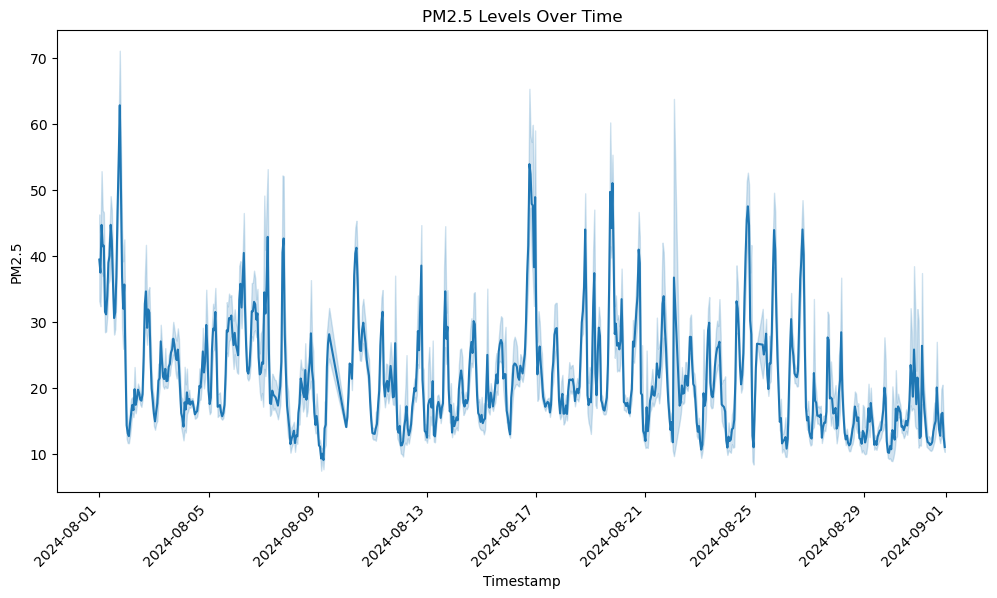

In [8]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='timestamp', y='pm2_5', data=df)
plt.title('PM2.5 Levels Over Time')
plt.xlabel('Timestamp')
plt.ylabel('PM2.5')

plt.xticks(rotation=45, ha='right')
plt.show()

### Showcasing missing hours per monitor

In [9]:
# Create a complete time range (hourly) for each monitor
all_timestamps = pd.date_range(start=df['timestamp'].min(), end=df['timestamp'].max(), freq='H')
monitors = df['display_name'].unique()

In [10]:
# Create a DataFrame for all timestamps and monitors
complete_data = pd.MultiIndex.from_product([all_timestamps, monitors], names=['timestamp', 'display_name'])
complete_df = pd.DataFrame(index=complete_data).reset_index()


In [11]:
# Merge with the original data
df = pd.merge(complete_df, df, on=['timestamp', 'display_name'], how='left')


In [12]:
# Add a column to indicate missing values
df['missing'] = df['pm2_5'].isna()

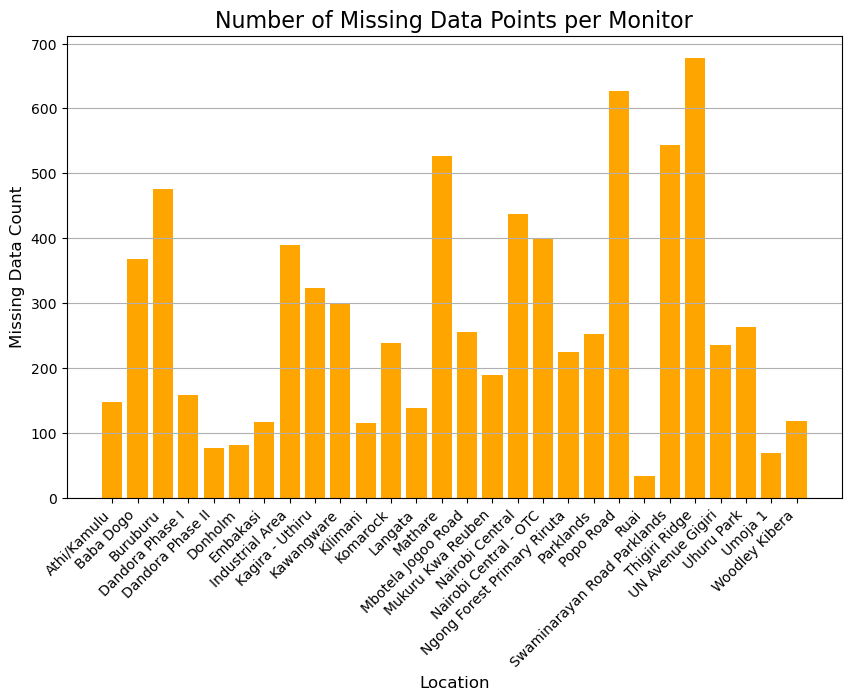

In [13]:
# Count missing values for each monitor
missing_counts = df.groupby('display_name')['missing'].sum().reset_index()

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(missing_counts['display_name'], missing_counts['missing'], color='orange')

# Add labels and title
plt.title("Number of Missing Data Points per Monitor", fontsize=16)
plt.xlabel("Location", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Missing Data Count", fontsize=12)
plt.grid(axis='y')
plt.show()


### Mean for each location

In [14]:
# Group the data by location and calculate the mean pm2.5 for each location
location_pm =df.groupby('display_name')['pm2_5'].mean().reset_index()

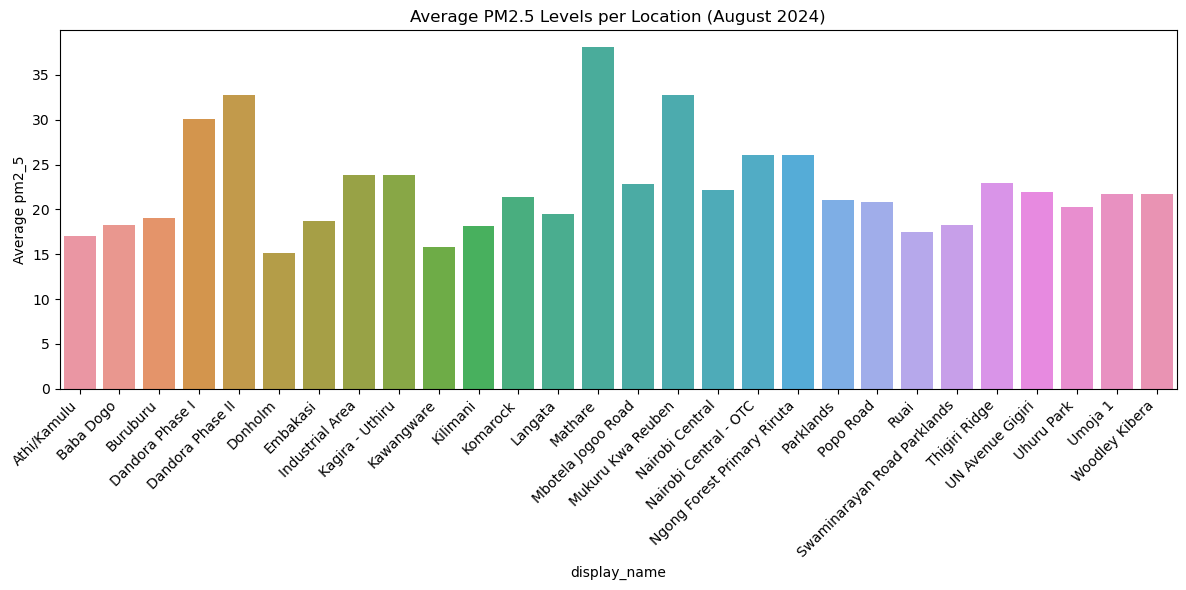

In [15]:
# Plotting the bar graph
plt.figure(figsize=(12, 6))
sns.barplot(x='display_name', y='pm2_5', data=location_pm)

# Add labels and title
plt.title('Average PM2.5 Levels per Location (August 2024)')
plt.xlabel('display_name')
plt.ylabel('Average pm2_5')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()